To run this notebook in IBM Watson Studio (for free), click on the button below and then click on the same button again (top right).

In case you need a (free, never expiring, no credit card needed) IBM Cloud account, you can get one here: [ibm.biz/coursera](https://ibm.biz/coursera) (tracked URL)

[![](https://github.com/romeokienzler/TensorFlow/raw/master/images/playbutton.png)](https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/d94668e2-3d68-4ee2-bc87-00a885803726/view?access_token=76adb4b998e7cb7bed5e53b0c1a99fb99a0b0a7a24498881e766c094845f0366)




Now it's time to install TensorFlow 2.x - as of writing of this notebook, there is only an alpha version available

In [1]:
# the backend needs to be installed first:
!pip install tensorflow==1.14.0

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Now just make sure you restart the Kernel so that the changes take effect:

![](https://github.com/romeokienzler/TensorFlow/raw/master/images/restart_kernel.png)

After the kernel has been restarted, we'll check if we are on TensorFlow 2.x

In [2]:
import tensorflow as tf

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-pack

In [3]:
tf.__version__

'1.14.0'

So this worked out. Now it's time to create and run a keras model. Since MNIST is getting boring, let's use the fashion MNIST dataset. If you want to learn more on the data set check out the following links

[MNIST](https://en.wikipedia.org/wiki/MNIST_database)  
[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist)

So in a nutsthell, MNIST contains 60000 28x28 pixel grey scale images of handwritten digits between 0-9 and the corresponding labels. Plus additional 10000 images for testing.

Fashing MNIST contains 60000 28x28 pixel grey scale images of fashion articles and the corresponding labels between 0-9. It also contains 10000 test images.

Luckyly, this data set is built in to Keras, so let's load it:

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step



| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

0


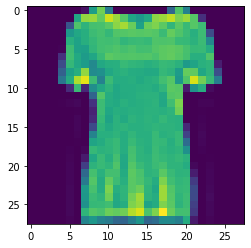

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
i = 10
print(train_labels[i])
plt.imshow(train_images[i])

As expected, we get 60000 images of 28 by 28 pixels:

In [6]:
train_images.shape

(60000, 28, 28)

The labels are simply a list of 60000 elements, each one is a number (label) between 0 and 9:

In [7]:
print(train_labels.shape)
print(train_labels)

(60000,)
[9 0 0 ... 3 0 5]


Let's have a look at one image:

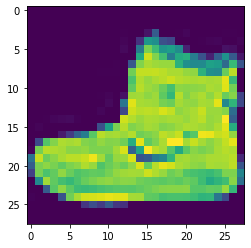

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0])
plt.show()


So this is obviously a shoe :) - Let's normalize the data by making sure every pixel value is between 0..1; this is easy in this case:

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

For those already familiar with Keras might notice, that mainly only the import statements changed. If you are new to Keras, just check out Week 2 of my DeepLearning course on Coursera, you can get it for free in audit mode: http://coursera.org/learn/ai/. So let's start with ordinary Keras by importing some requirements:

In order to write our **hello world** softmax regression model, the following code does the job. If you are familiar with Keras, this is really basic stuff. There is only one catch. The following code doesn't run since the latest stable Keras version is incompatible with the alpha release of TensorFlow 2.0. So the following code is for illustration purposes only. Don't run it, it will destroy your hard drive.

So from a migration and consistency perspective, it would be nice if we just could change the imports and leave our existing Keras code (which we all love) intact, so let's give it a try:

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.nn import relu
from tensorflow.nn import softmax


# Here all the layers of the model are specified at once
# but it can also be done by starting with just:
# model = Sequential()
# and then adding layers one-by-one:
# model.add(Dense=256, activation="sigmoid", input_shape(784,)) or something with correct dimensions
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation=relu),
    Dense(10, activation=softmax)
])

# next the model is compiled with a loss function and an optimizer
model.compile(optimizer='adam', 
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

# then last, the model is fit on training data
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, verbose=1)

#model.evaluate(test_images, test_labels)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 17s 289us/sample - loss: 0.4993 - acc: 0.8239 - val_loss: 0.4147 - val_acc: 0.8562
Epoch 2/5
60000/60000 [==============================] - 17s 285us/sample - loss: 0.3759 - acc: 0.8643 - val_loss: 0.4210 - val_acc: 0.8450
Epoch 3/5
60000/60000 [==============================] - 17s 284us/sample - loss: 0.3371 - acc: 0.8777 - val_loss: 0.3731 - val_acc: 0.8686
Epoch 4/5
60000/60000 [==============================] - 18s 294us/sample - loss: 0.3121 - acc: 0.8862 - val_loss: 0.3685 - val_acc: 0.8674
Epoch 5/5
60000/60000 [==============================] - 18s 292us/sample - loss: 0.2950 - acc: 0.8919 - val_loss: 0.3526 - val_acc: 0.8733


As you can see, we didn't change the Keras code at all, but now all imports are coming from the tensorflow package. I felt a bit bad when I've noticed that TensorFlow has eaten up Keras, but in reality, nobody uses a Keras runtime other then TensorFlow anyway, so it doesn't really matter. Just be aware that Keras is Google now and part of TensorFlow. In the next notebook, we'll cover the stategies for parallel training. So stay tuned.

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout


from tensorflow.keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

x_train = train_images
x_test = test_images
y_train = train_labels
y_test = test_labels

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

#model.compile(loss=keras.losses.categorical_crossentropy,
        #      optimizer=keras.optimizers.Adadelta(),
     #         metrics=['accuracy'])

model.compile(optimizer='adam', 
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 207s 3ms/sample - loss: 0.5156 - acc: 0.8171 - val_loss: 0.3553 - val_acc: 0.8738
Epoch 2/12
60000/60000 [==============================] - 229s 4ms/sample - loss: 0.3377 - acc: 0.8792 - val_loss: 0.2844 - val_acc: 0.8967
Epoch 3/12
60000/60000 [==============================] - 222s 4ms/sample - loss: 0.2896 - acc: 0.8964 - val_loss: 0.2653 - val_acc: 0.9029
Epoch 4/12
60000/60000 [==============================] - 225s 4ms/sample - loss: 0.2558 - acc: 0.9068 - val_loss: 0.2472 - val_acc: 0.9079
Epoch 5/12
60000/60000 [==============================] - 222s 4ms/sample - loss: 0.2352 - acc: 0.9145 - val_loss: 0.2312 - val_acc: 0.9151
Epoch 6/12
60000/60000 [==============================] - 223s 4ms/sample - loss: 0.2119 - acc: 0.9213 - val_loss: 0.2270 - val_acc: 0.9180
Epoch 7/12
60000/60000 [==============================] - 221s 4ms/sample - loss: 0.1960 - acc: 0.9265 - val_l

[end]